# Analyse Descriptive: Projet VDOCLABS

# Importation des bibliothèques nécessaires

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from ipywidgets import interact,widgets
import folium
import io
from fanalysis.ca import CA
plt.style.use('ggplot')
import seaborn as sns

%matplotlib inline

In [6]:
patient = pd.read_csv("Data_VDOCLABS/Patients.csv",header=0,sep=";")

### 1-Classer les patients selon leurs age , sexe et region

In [8]:
#liste des patients dtaillé et trié selon l`age
fig=go.FigureWidget(layout=go.Layout())
def highlight_col(x):
  r='background-color:pink'
  y='background-color:purple'
  g='background-color:grey'
  gr='background-color:green'
  df1=pd.DataFrame('',index=x.index,columns=x.columns)
  df1.iloc[:,2]=y
  df1.iloc[:,5]=r
  df1.iloc[:,7]=g
  df1.iloc[:,4]=gr

  return df1

def show_cases(n):
  n=int(n)
  return patient.sort_values('region',ascending=False).head(n).style.apply(highlight_col,axis=None)

interact(show_cases,n='10')

ipywLayout=widgets.Layout(border='solid 2px green')
ipywLayout.display='none'
widgets.VBox([fig],layout=ipywLayout)

interactive(children=(Text(value='10', description='n'), Output()), _dom_classes=('widget-interact',))

    'data': [], 'layout': {'template': '...'}
}),), layout=Layout(border='solid …

In [10]:
patient.Age.describe().round(0)

count    998.0
mean      51.0
std       28.0
min        1.0
25%       28.0
50%       49.0
75%       76.0
max       99.0
Name: Age, dtype: float64

In [11]:
m=patient.groupby('Gender').median()
m

,Id_Patient,Age,Id_region
Gender,,,
Female,480,51,43
Male,523,48,43


##### La region qui contient le plus grand nombre de maladies 

In [12]:
patient.region.describe()

count       998
unique       20
top       Tunis
freq        609
Name: region, dtype: object

In [13]:
patient.describe(include='O')

,Patient_code,Name,Gender,Disease,region
count,998,998,998,998,998
unique,998,998,2,76,20
top,60059454fc13ae5e170000a1,RegenFloyde,Female,Covid-19,Tunis
freq,1,1,521,210,609


#### la moyenne d´age

In [14]:
patient.Age.median()

49.0

In [15]:
patient.Gender.value_counts()

Female    521
Male      477
Name: Gender, dtype: int64

In [16]:
pd.crosstab(patient.Gender, "freq")

col_0,freq
Gender,
Female,521
Male,477


#### nombre de patient par sexe 

In [17]:
pd.crosstab(patient.Gender, "freq", normalize=True)

col_0,freq
Gender,
Female,0.522044
Male,0.477956


Text(0.5, 1.0, 'nombre de Patient par Region')

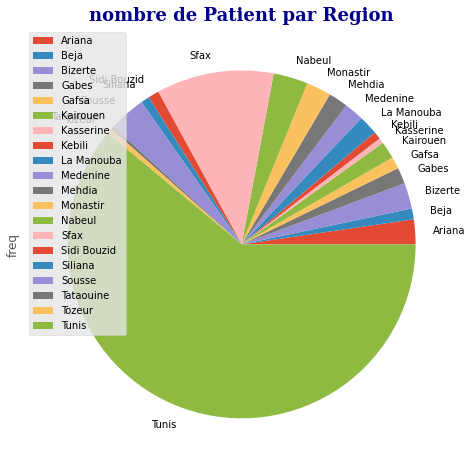

In [18]:
region = pd.crosstab(patient.region, "freq")
region.plot.pie(subplots=True, figsize = (8, 8))
plt.title("nombre de Patient par Region", 
          fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 18})


Text(0.5, 1.0, 'nombre de patient par Sexe')

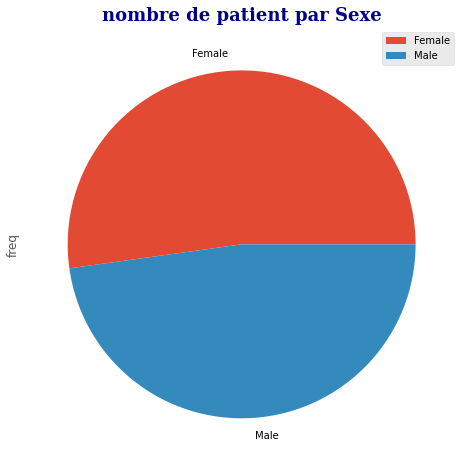

In [19]:
gender = pd.crosstab(patient.Gender, "freq")
gender.plot.pie(subplots=True, figsize = (8, 8))
plt.title("nombre de patient par Sexe", 
          fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 18})

#### nombre de maladie par region

In [20]:

mr=pd.crosstab(patient.region, patient.Disease,)
mr



Disease,fractures,myopie,"r??ducation et r?adaptation fonctionnelle""",schizophr?nie,troubles obsessionnels,Angine de poitrine,Ath?roscl?rose,Bradycardie,Bronchiolite,Cancer de l?estomac,...,pharyngite,polyarthrite rhumato?de,rhinite,sinusite,spondylarthrite,syndrome de Goujerot-Sj?gren,torsion du testicule,traumatisme grave,troubles bipolaires,troubles de la croissance
region,,,,,,,,,,,,,,,,,,,,,
Ariana,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
Beja,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Bizerte,1,0,0,0,0,0,0,0,2,0,...,0,0,0,1,0,0,0,0,0,0
Gabes,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Gafsa,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Kairouen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Kasserine,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kebili,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
La Manouba,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


##### lE NOMBRE DE PATIENT DANS UNE REGION SELON SEXE

In [21]:
gr=pd.crosstab(patient.region, patient.Gender, margins=True)
gr

Gender,Female,Male,All
region,,,
Ariana,12,11,23
Beja,5,5,10
Bizerte,16,8,24
Gabes,8,7,15
Gafsa,5,6,11
Kairouen,11,5,16
Kasserine,2,3,5
Kebili,4,3,7
La Manouba,10,8,18


In [22]:
max(patient["Age"]) - min(patient["Age"])

98

In [23]:
patient["Age"].skew() 

0.030643111854514574

In [24]:
prof_lig = np.apply_along_axis(arr=mr.values,axis=1,func1d=lambda x:x/np.sum(x))
#print(prof_lig)

In [33]:
#sns.jointplot(patient['Age' ],patient['Gender'])

# Analyse Factorielle des Correspondances(AFC)

In [25]:
X= np.asmatrix(mr)
my_ca = CA(row_labels=mr.index.values, col_labels=mr.columns.values)


In [26]:
my_ca.fit(mr.values)

CA(col_labels=array([' fractures', ' myopie',
       ' r??ducation et r?adaptation fonctionnelle"', ' schizophr?nie',
       ' troubles obsessionnels', 'Angine de poitrine', 'Ath?roscl?rose',
       'Bradycardie', 'Bronchiolite', 'Cancer de l?estomac',
       'Cancers cutan?s', 'Cardiomyopathies', 'Chirurgie', 'Colites',
       'Covid-19', 'D?pression', 'Diab?te n?onatal', 'Fissures ',
       'Frottis gyn?cologique;Medenine...
       'spondylarthrite', 'syndrome de Goujerot-Sj?gren',
       'torsion du testicule', 'traumatisme grave', 'troubles bipolaires',
       'troubles de la croissance'], dtype=object),
   row_labels=array(['Ariana', 'Beja', 'Bizerte', 'Gabes', 'Gafsa', 'Kairouen',
       'Kasserine', 'Kebili', 'La Manouba', 'Medenine', 'Mehdia',
       'Monastir', 'Nabeul', 'Sfax', 'Sidi Bouzid', 'Siliana', 'Sousse',
       'Tataouine', 'Tozeur', 'Tunis'], dtype=object))

### 1-Analyse des valeurs propres

In [28]:
#print(my_ca.eig_)

#### 1.1 les valeurs propres en valeur absolue

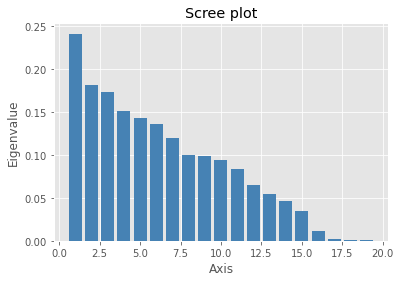

In [30]:
my_ca.plot_eigenvalues()

#### 1.2 les valeurs propres en pourcentage de la variance totale

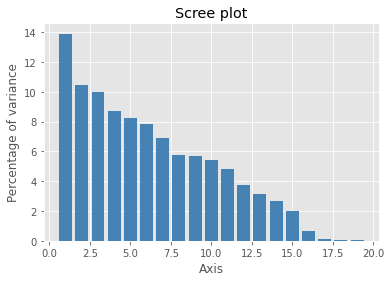

In [32]:
my_ca.plot_eigenvalues(type="percentage")

#### 1.3 les valeurs propres en pourcentage cumulé de la variance totale

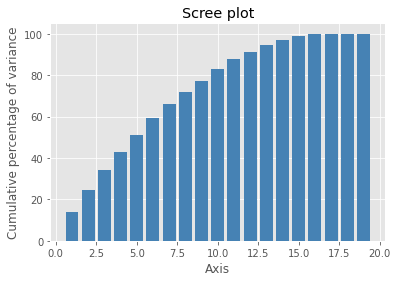

In [34]:
my_ca.plot_eigenvalues(type="cumulative")

### 2-Extraction des statistiques sur les points lignes et colonnes

In [35]:
mr_rows = my_ca.row_topandas()
#print(mr_rows)

In [36]:
#print(my_ca.row_coord_)

In [37]:
#print(my_ca.row_contrib_)

In [38]:
#print(my_ca.row_cos2_)

In [39]:
mr_cols = my_ca.col_topandas()
#print(mr_cols)

In [40]:
#print(my_ca.col_coord_)


In [41]:
#print(my_ca.col_contrib_)

In [42]:
#print(my_ca.col_cos2_)

## Graphiques factoriels

#### Concentration des types de maladies selon region

In [ ]:
on observe quels sont les points lignes et colonnes qui présentent les plus fortes contributions et cos2 pour cet axe

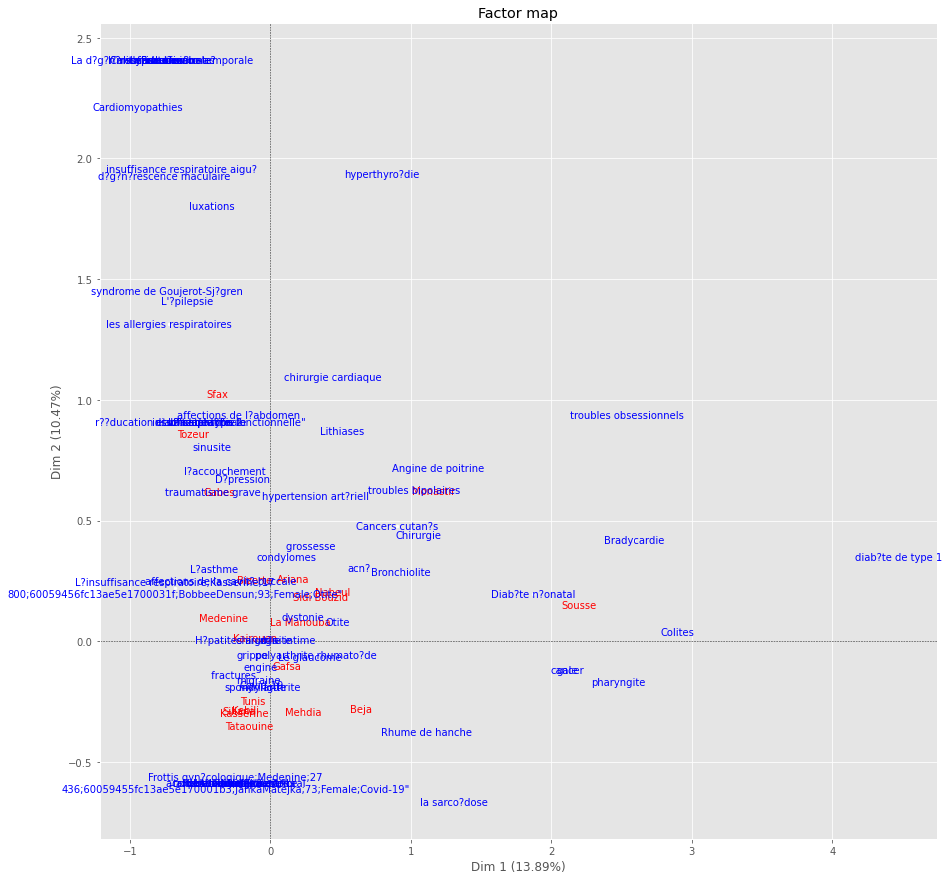

In [72]:
## Mapping simultané des points lignes et colonnes
# Les paramètres de la méthode mapping indiquent que ce sont les axes 1 et 2 qui sont ici représentés
my_ca.mapping(num_x_axis=1, num_y_axis=2,figsize=(15, 15))


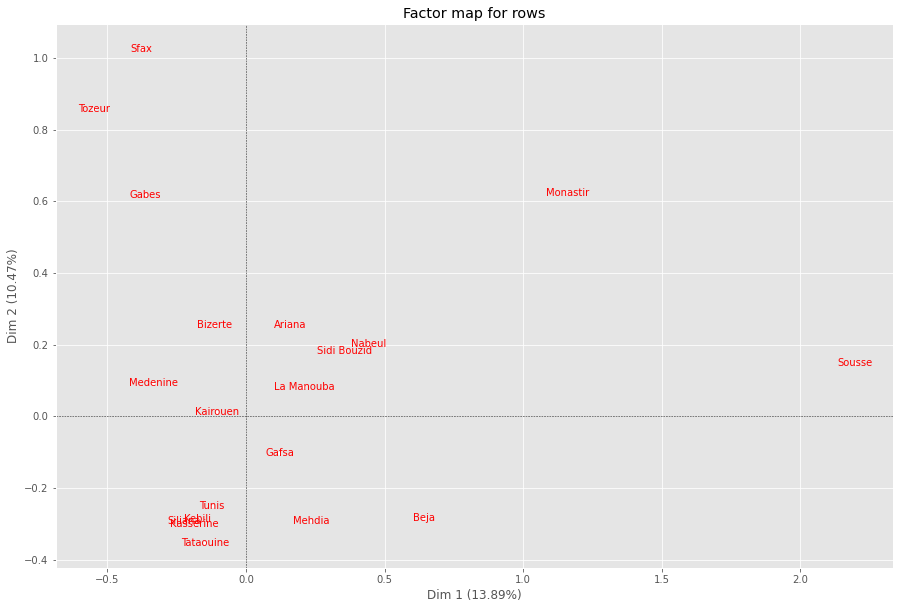

In [178]:
# mapping des points lignes (region)
my_ca.mapping_row(num_x_axis=1, num_y_axis=2,figsize=(15, 10))

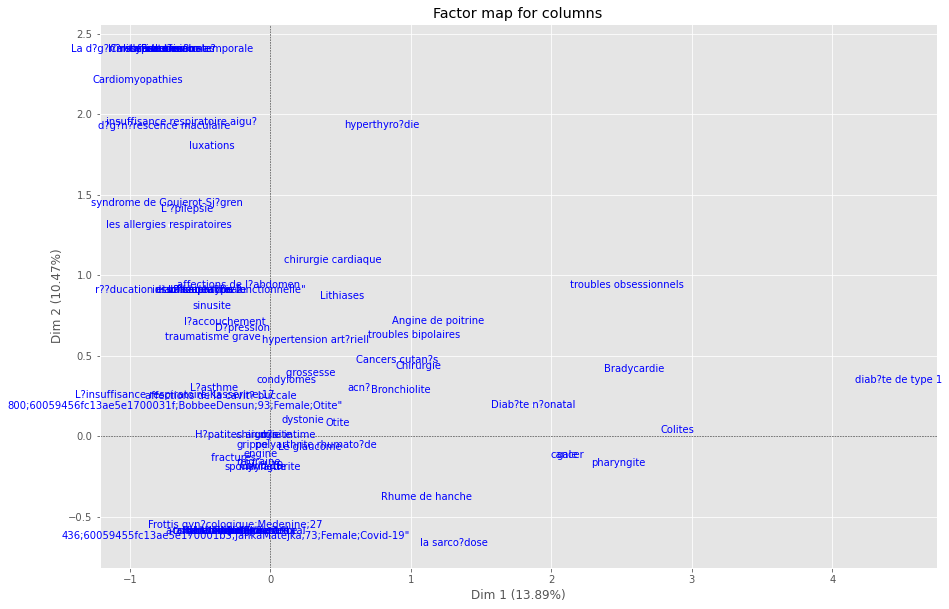

In [179]:
# mapping des points colonnes (maladie)
my_ca.mapping_col(num_x_axis=1, num_y_axis=2,figsize=(15, 10))

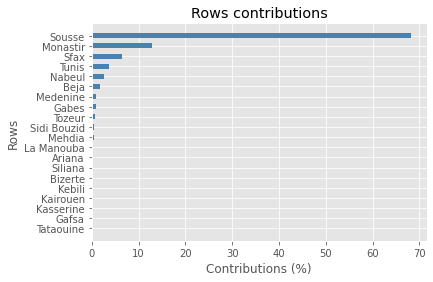

In [180]:
# Classement des points lignes en fonction de leur contribution au 1er axe
# Le paramètre de la méthode plot_row_contrib indique que c'est pour l'axe numéro 1 que les contributions sont ici 
# représentées
my_ca.plot_row_contrib(num_axis=1)


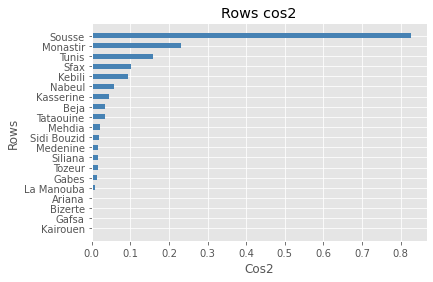

In [181]:
# Classement des points lignes en fonction de leur cos2 sur le 1er axe
my_ca.plot_row_cos2(num_axis=1)

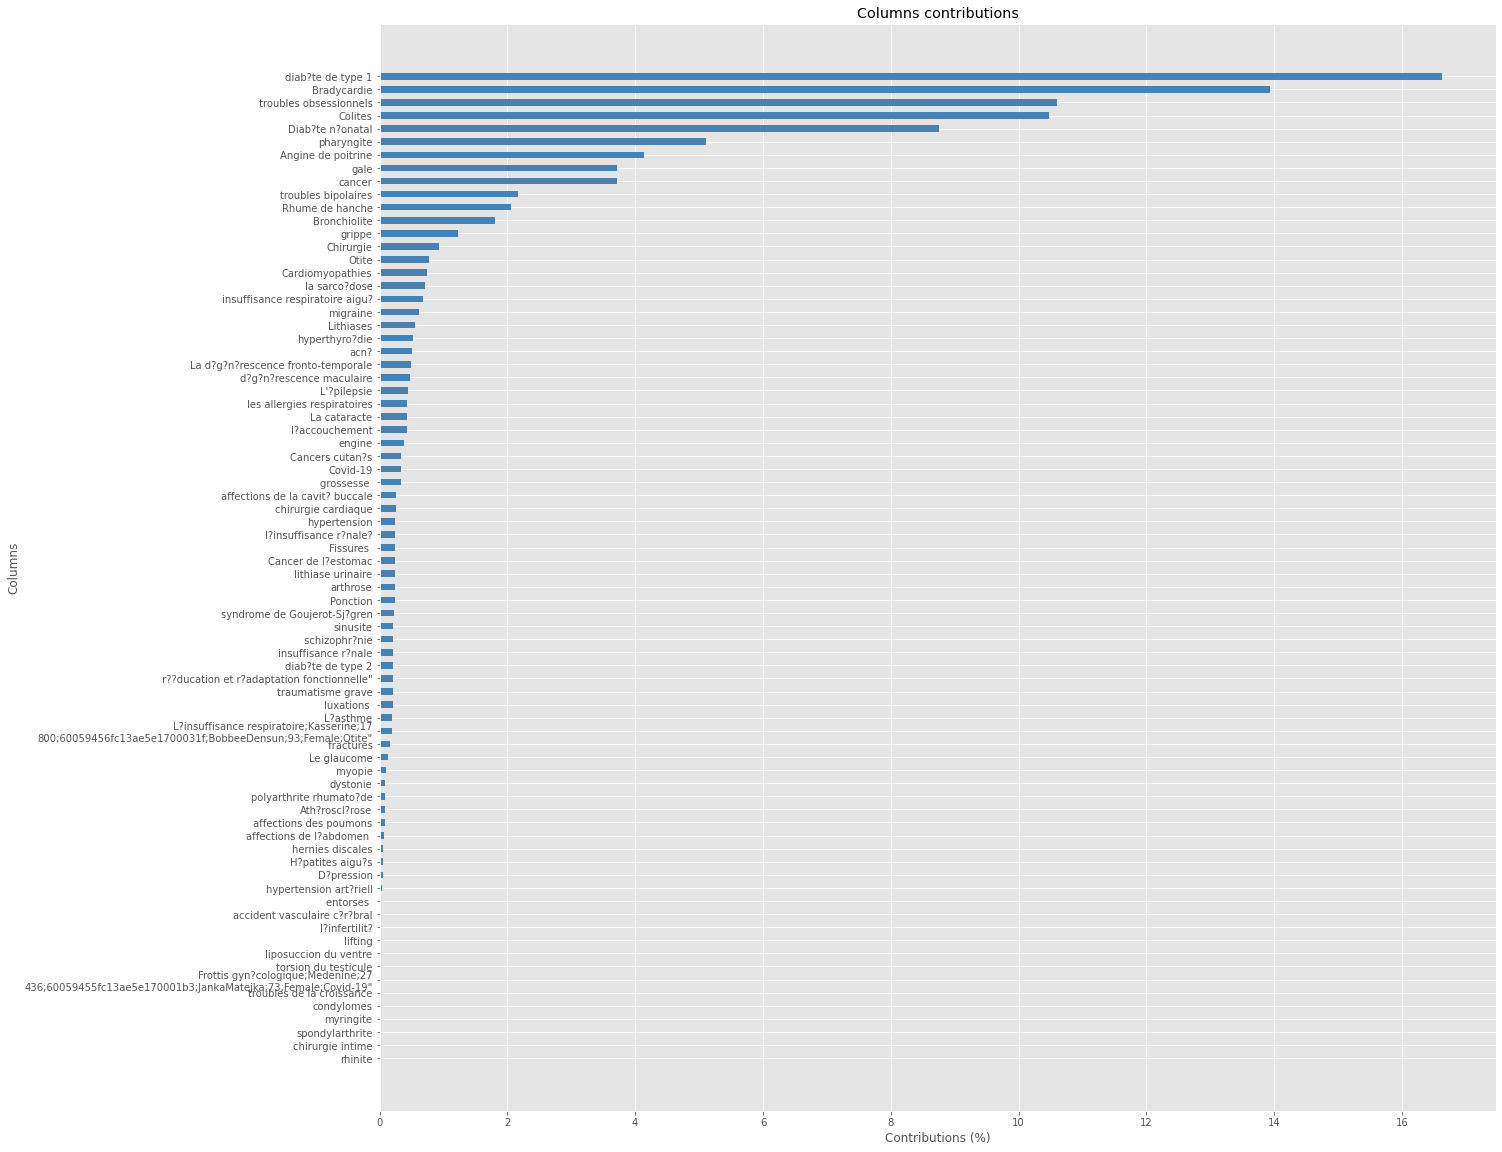

In [182]:
#Classement des points colonnes en fonction de leur contribution au 1er axe
my_ca.plot_col_contrib(num_axis=1,figsize=(20, 20))

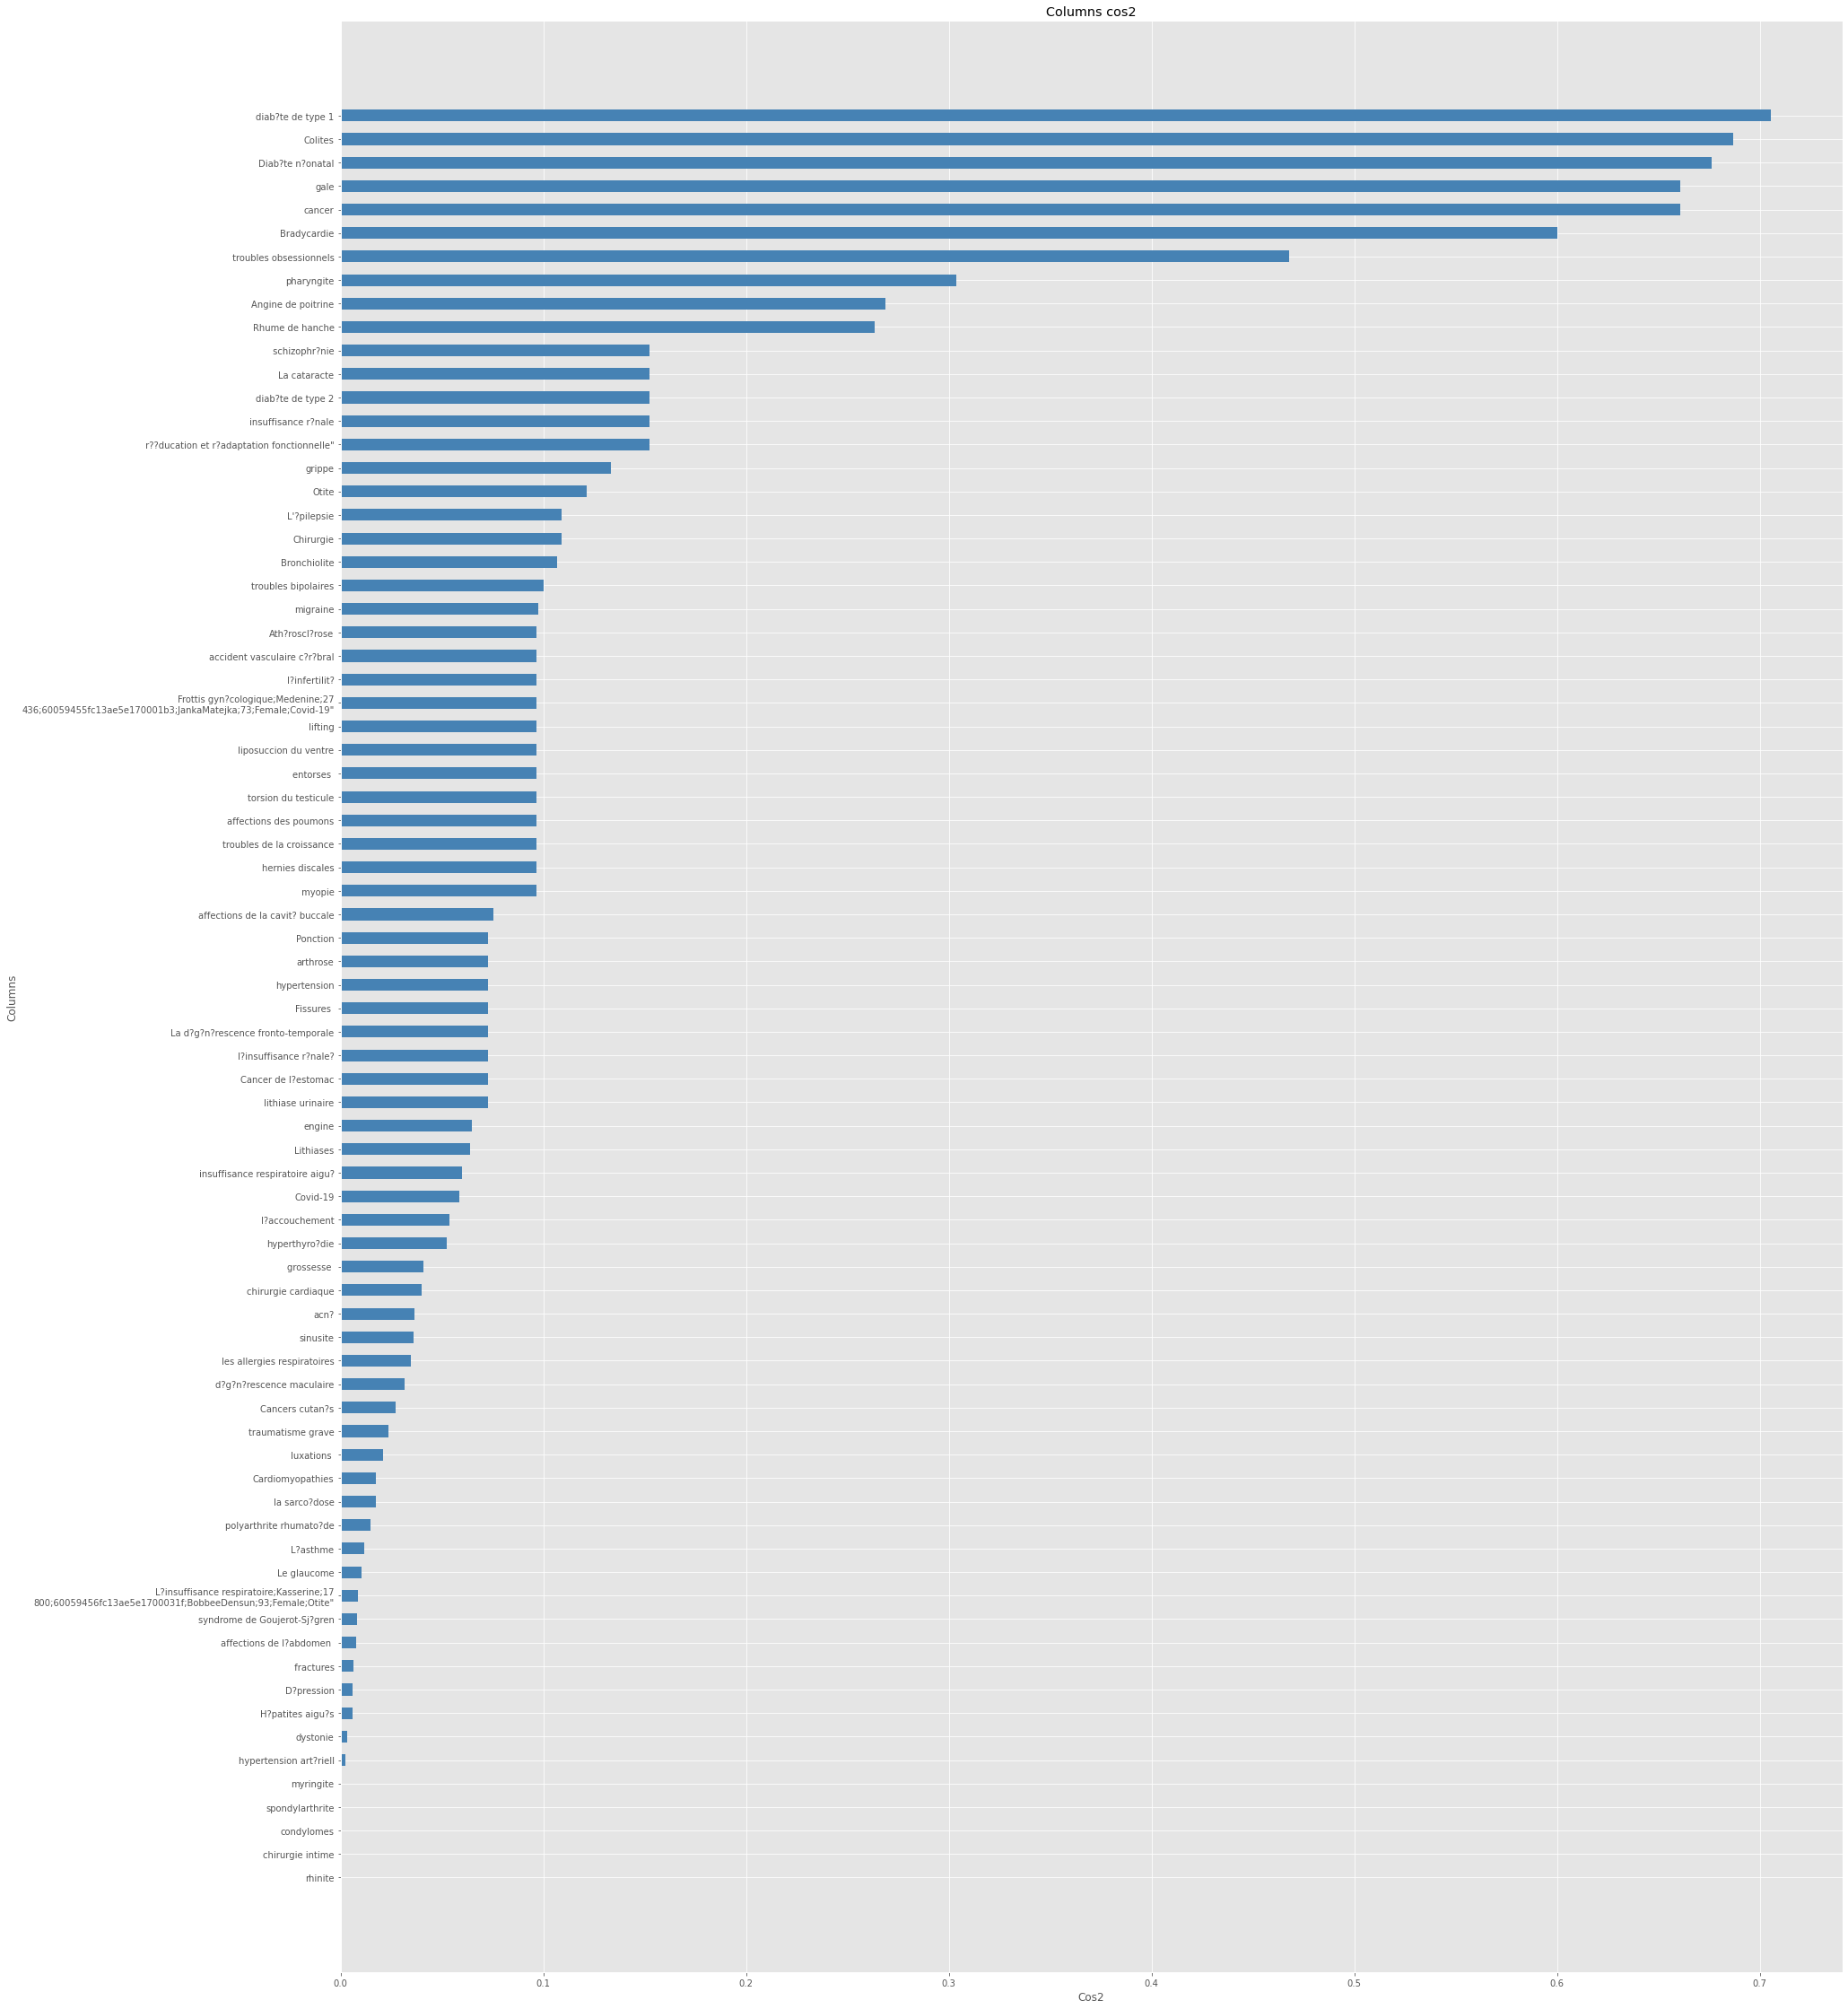

In [240]:
# Classement des points colonnes en fonction de leur cos2 sur le 1er axe
my_ca.plot_col_cos2(num_axis=1,figsize=(30, 40))

In [76]:
#importation de la librairie
from fanalysis.ca import CA
#lancer les calculs
afc = CA(row_labels=mr.index,col_labels=mr.columns)
afc.fit(mr.values)

#information restituée sur les facteurs
print(afc.eig_)

[[2.40985114e-01 1.81636145e-01 1.73266966e-01 1.50672806e-01
  1.43308269e-01 1.35364060e-01 1.19067769e-01 1.00089808e-01
  9.81552625e-02 9.41637508e-02 8.34400217e-02 6.43546277e-02
  5.40263736e-02 4.63901066e-02 3.42682696e-02 1.15605074e-02
  2.53536099e-03 1.34528368e-03 5.83128712e-04]
 [1.38879219e+01 1.04676532e+01 9.98533913e+00 8.68324243e+00
  8.25882568e+00 7.80100257e+00 6.86185074e+00 5.76815481e+00
  5.65666733e+00 5.42663734e+00 4.80863107e+00 3.70874379e+00
  3.11352866e+00 2.67345218e+00 1.97487324e+00 6.66229635e-01
  1.46112326e-01 7.75284184e-02 3.36055862e-02]
 [1.38879219e+01 2.43555751e+01 3.43409142e+01 4.30241566e+01
  5.12829823e+01 5.90839849e+01 6.59458356e+01 7.17139904e+01
  7.73706578e+01 8.27972951e+01 8.76059262e+01 9.13146700e+01
  9.44281986e+01 9.71016508e+01 9.90765240e+01 9.97427537e+01
  9.98888660e+01 9.99663944e+01 1.00000000e+02]]


In [228]:
#coordonnées des modalités lignes
#print(pd.DataFrame(afc.row_coord_,index=mr.index))

In [229]:
prof_lig = np.apply_along_axis(arr=mr.values,axis=1,func1d=lambda x:x/np.sum(x))
#print(prof_lig)

In [230]:
tot_col = np.sum(mr.values,axis=0)
print(tot_col)

[  5   4   2   2   4   7   3   5   5   1   1   2   2   3 210   3   6   1
   1   2   3   3   1   4   2   4   5   8   1   4   1   3   4   5   3   1
   2   3   2   2   2   2   2   4 205   1   2 191   9   2   1   1   2   2
   4  10   1   1   1   2   1   1   1   3 191   3   2   2   2   3   3   1
   1   3   5   1]


## Decision tree: Prediction des maladies selon Age,sexe et region

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [192]:
df1= patient[['Age','Gender','region','Disease']]
X=patient[['Age','Gender','region']]
X_encoded=pd.get_dummies(X,columns=['Gender','region'])
y=patient[['Disease']]
X_train,X_test,y_train,y_test=train_test_split(X_encoded,y,random_state=42)
clf_dt=DecisionTreeClassifier(random_state=42)
clf_dt=clf_dt.fit(X_train,y_train)

In [193]:
df1['num']=[i for i in range(len(df1))]
df1_18=df1[(df1["Age"] < 19) ]
df19_30=df1[(df1["Age"] < 31) & (df1["Age"] >18)]
df30_60=df1[(df1["Age"] < 61) & (df1["Age"] >30)]
df61=df1[ (df1["Age"] >60)]


<ipython-input-193-a1519118f562>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [244]:
X=df1_18[['Age','Gender','region']]
X_encoded=pd.get_dummies(X,columns=['Gender','region'])
y=df1_18[['Disease']]
X_train,X_test,y_train,y_test=train_test_split(X_encoded,y,random_state=42)
clf_dt=DecisionTreeClassifier(random_state=42)
clf_dt=clf_dt.fit(X_encoded,y)
y_test_pred1=clf_dt.predict(X_encoded)
from sklearn.metrics import accuracy_score
print(accuracy_score(y,y_test_pred1))

0.6863905325443787


In [195]:
X=df19_30[['Age','Gender','region']]
X_encoded=pd.get_dummies(X,columns=['Gender','region'])
y=df19_30[['Disease']]
X_train,X_test,y_train,y_test=train_test_split(X_encoded,y,random_state=42)
clf_dt=DecisionTreeClassifier(random_state=42)
clf_dt=clf_dt.fit(X_encoded,y)
y_test_pred2=clf_dt.predict(X_encoded)
from sklearn.metrics import accuracy_score
print(accuracy_score(y,y_test_pred2))

0.6776859504132231


In [196]:
X=df30_60[['Age','Gender','region']]
X_encoded=pd.get_dummies(X,columns=['Gender','region'])
y=df30_60[['Disease']]
X_train,X_test,y_train,y_test=train_test_split(X_encoded,y,random_state=42)
clf_dt=DecisionTreeClassifier(random_state=42)
clf_dt=clf_dt.fit(X_encoded,y)
y_test_pred3=clf_dt.predict(X_encoded)
from sklearn.metrics import accuracy_score
print(accuracy_score(y,y_test_pred3))

0.6548387096774193


In [197]:
X=df61[['Age','Gender','region']]
X_encoded=pd.get_dummies(X,columns=['Gender','region'])
y=df61[['Disease']]
X_train,X_test,y_train,y_test=train_test_split(X_encoded,y,random_state=42)
clf_dt=DecisionTreeClassifier(random_state=42)
clf_dt=clf_dt.fit(X_encoded,y)
y_test_pred4=clf_dt.predict(X_encoded)
from sklearn.metrics import accuracy_score
print(accuracy_score(y,y_test_pred4))

0.6934673366834171


In [198]:
global_res=[]
for i in range(len(df1)):
    global_res.append("")
print(len(y_test_pred1))
print(len(global_res))
for i in range(len(df1_18)):
    x=df1_18.iloc[i].num
    global_res[x]=y_test_pred1[i]
for i in range(len(df19_30)):
    x=df19_30.iloc[i].num
    global_res[x]=y_test_pred2[i]
for i in range(len(df30_60)):
    x=df30_60.iloc[i].num
    global_res[x]=y_test_pred3[i]
for i in range(len(df61)):
    x=df61.iloc[i].num
    global_res[x]=y_test_pred4[i]
y=df1[['Disease']]
print(accuracy_score(y,global_res))

169
998
0.6783567134268537


In [200]:
#   0.64   
#----> 1-18 19-30 31-60 61-99